In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Creating class K-Means

class KMeans:
    def __init__(self, k=2, max_iter=100):
        self.k = k
        self.max_iter = max_iter
        
    def fit(self, X):
        self.centroids = []
        for i in range(self.k):
            self.centroids.append(X[np.random.randint(0, len(X))])
            
        for i in range(self.max_iter):
            self.clusters = {}
            for j in range(self.k):
                self.clusters[j] = []
                
            for x in X:
                distances = [np.linalg.norm(x - c) for c in self.centroids]
                cluster = np.argmin(distances)
                self.clusters[cluster].append(x)
                
            prev_centroids = self.centroids.copy()
            
            for cluster in self.clusters:
                self.centroids[cluster] = np.average(self.clusters[cluster], axis=0)
                
            converged = True
            for j in range(self.k):
                if not np.array_equal(self.centroids[j], prev_centroids[j]):
                    converged = False
                    break
                    
            if converged:
                break
                
    def predict(self, X):
        predictions = []
        for x in X:
            distances = [np.linalg.norm(x - c) for c in self.centroids]
            cluster = np.argmin(distances)
            predictions.append(cluster)
        return predictions




[array([7.33333333, 9.        ]), array([1.16666667, 1.46666667])]
[1, 1, 0, 0, 1, 0]


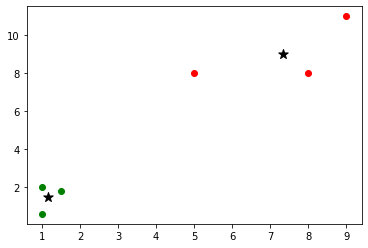

In [3]:
# example usage
X = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])
kmeans = KMeans(k=2)
kmeans.fit(X)
print(kmeans.centroids)
print(kmeans.predict(X))

# plot the clusters
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for i in range(kmeans.k):
    plt.scatter(np.array(kmeans.clusters[i])[:,0], np.array(kmeans.clusters[i])[:,1], color=colors[i])
plt.scatter(np.array(kmeans.centroids)[:,0], np.array(kmeans.centroids)[:,1], color='k', marker='*', s=100)
plt.show()